# Usage

A simple usage is represented by this notebook

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import Image
from model import Gen, SceneDataModel

Generate a random series of input rectangles. 
- The input is a list of 2-ary tuples
- Each tuple means the (width, height)

In [2]:
inp = Gen.gen_inp(30)

In [3]:
inp[:3]

[(22, 56), (79, 81), (64, 28)]

``` python
# A typical input:
[(22, 56),
 (79, 81),
 (64, 28),
 (73, 42),
 (73, 29),
 (88, 31),
 (53, 10),
 (16, 33),
 (55, 22),
 (29, 70),
 (20, 78),
 (84, 30),
 (74, 37),
 (22, 13),
 (85, 10),
 (20, 13),
 (65, 51),
 (65, 71),
 (91, 32),
 (100, 13),
 (53, 60),
 (27, 87),
 (23, 93),
 (49, 16),
 (94, 19),
 (18, 62),
 (82, 23),
 (58, 64),
 (46, 93),
 (23, 33)]
```

Read the input.

In [4]:
s = SceneDataModel()
s.read_input(inp)

Sorting the rectangles (default by their area) is a very advantageous heuristics.
- The total bounding area and the fill rate is shown in the figure
- The fill rate is the sum of rectangle area divided by the bounding area

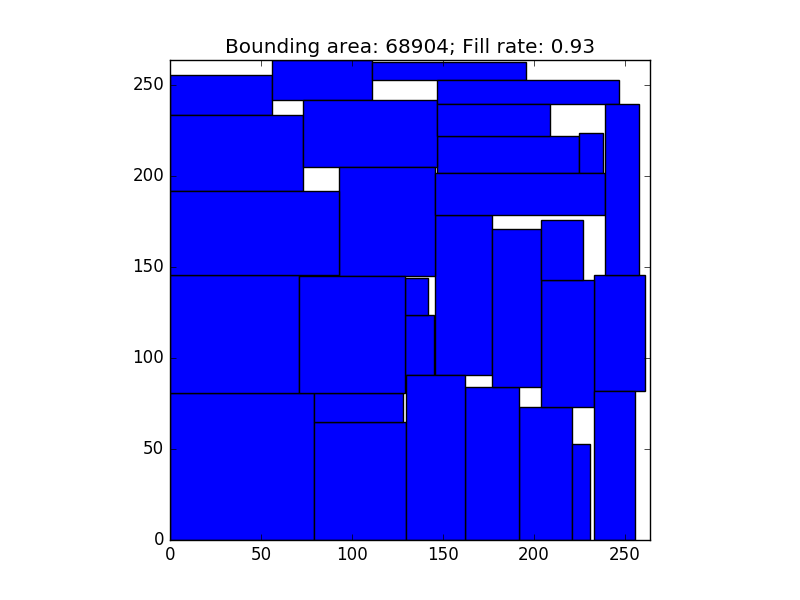

In [5]:
s.sort()
s.greedy_init()
Image(s.figure_state)

Solutions without pre-sorting can also be explored. But it seems seldom better.

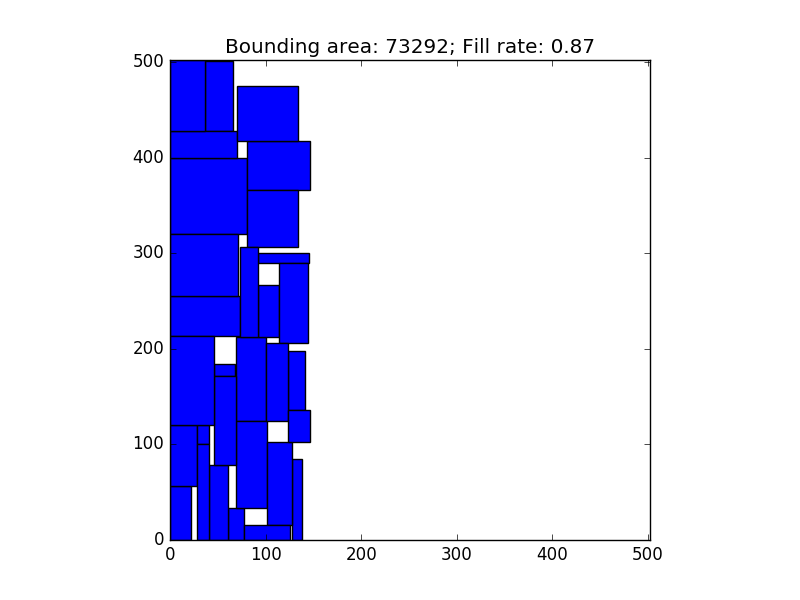

In [6]:
s.deconstruct_all()
s.shuffle()
s.greedy_init()
Image(s.figure_state)

Pre-sorting with other criterions like the 'width' or the 'height' of rectangles. 

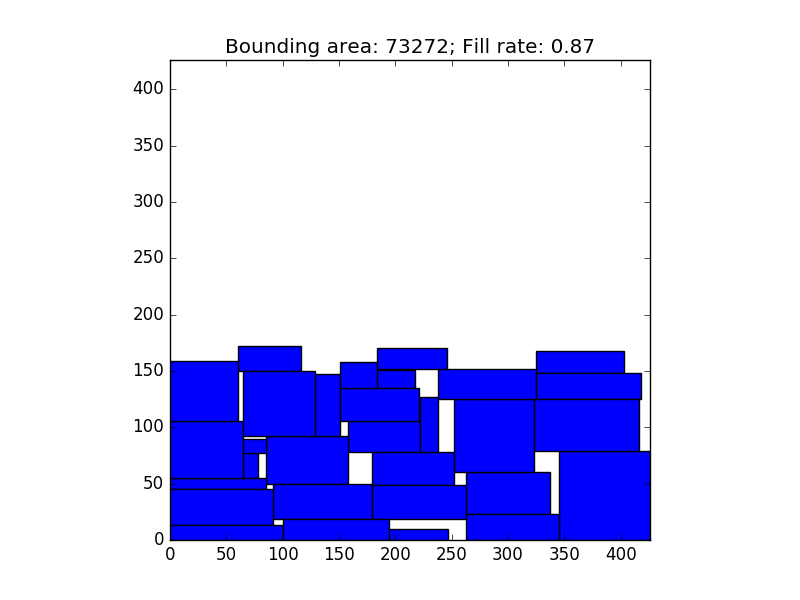

In [7]:
s.reset()
s.sort('width')
s.greedy_init()
Image(s.figure_state)

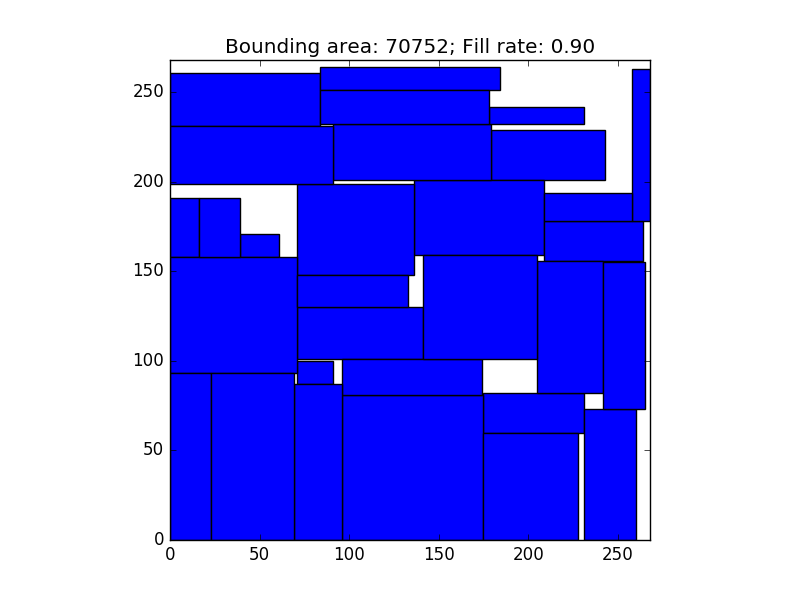

In [8]:
s.reset()
s.sort('height')
s.greedy_init()
Image(s.figure_state)

## Detailed approach of solving
- The model is implemented with an abstract data structure resembling the *threaded-tree*
- Incrementally, a rectangle is installed to a corner and new corners get generated by such installation. Then the new corners (only top-left corner and bottom-right corner of this rectangle are included for simplicity) are treated as children of the just used corner, which is their parent in the *tree*
- The corner object is abstracted by the object *Turning*
- There are *convex* and *concave* turnings
- Each *Turning* is associated with four pointers, pointing left/right/up/down directions. Such information is used to detect spatial restrictions affecting the feasible size of rectangle which can be installed onto this turning
- When a rectangle is installed onto a convex turning, it is "slided" left (when at upleft turning) or downwards (when at downright turning) until hitting any installed rectangle or the boundary. Such installation two new corners into the current thread and a brand new "inner thread" into the model
- When a rectangle is installed onto a concave turning, merely the new corners are inserted into the current thread
- The spatial restriction at a turning for installing a rectangle is heuristically calculated by multiplying the distance between the left/right pointer's targets as well as the distance between the up/down pointer's targets
- With **greedy** method, which seems highly profiting